In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
time = np.linspace(0,1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range('2017-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds':ds, 'y':result})
df.head()

,ds,y
0,2017-01-01,0.000000
1,2017-01-02,0.103243
2,2017-01-03,0.205382
3,2017-01-04,0.305326
4,2017-01-05,0.402007


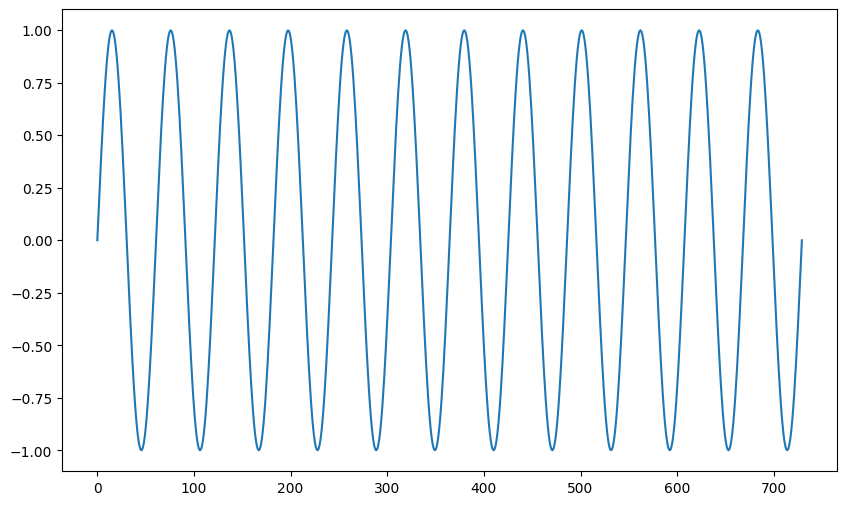

In [6]:
df["y"].plot(figsize=(10,6));

In [9]:
from prophet import Prophet

m=Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

09:45:15 - cmdstanpy - INFO - Chain [1] start processing
09:45:15 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)


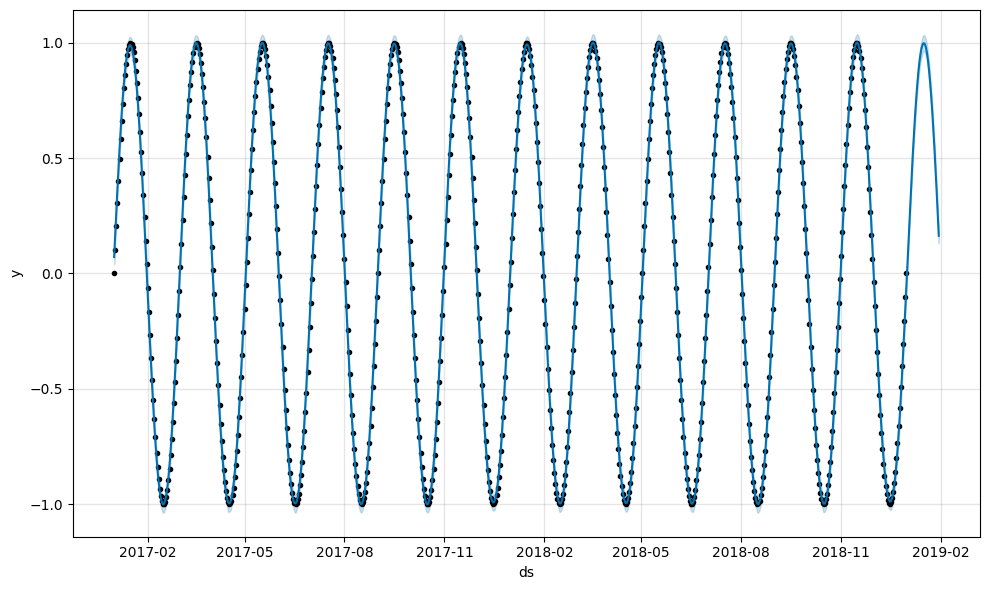

In [14]:
m.plot(forecast);

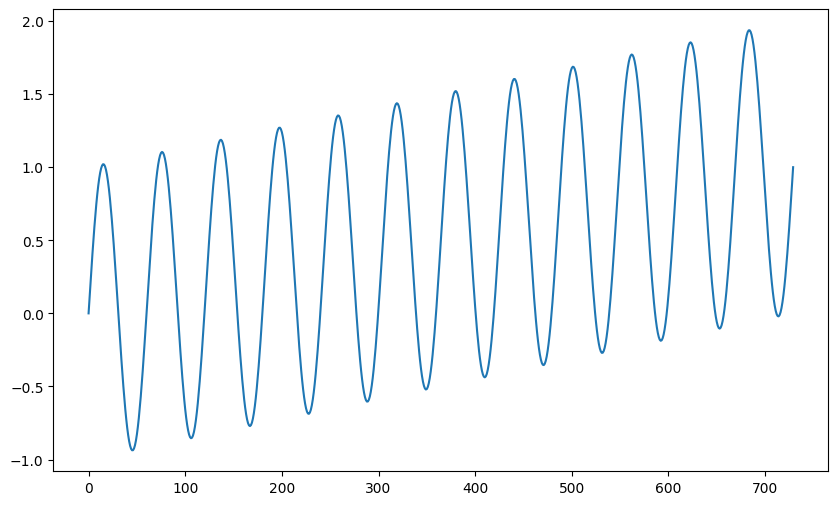

In [15]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time) + time

ds = pd.date_range("2017-01-01", periods=365*2, freq='D')
df = pd.DataFrame({'ds':ds, 'y':result})
df['y'].plot(figsize=(10,6));

09:55:39 - cmdstanpy - INFO - Chain [1] start processing
09:55:39 - cmdstanpy - INFO - Chain [1] done processing
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


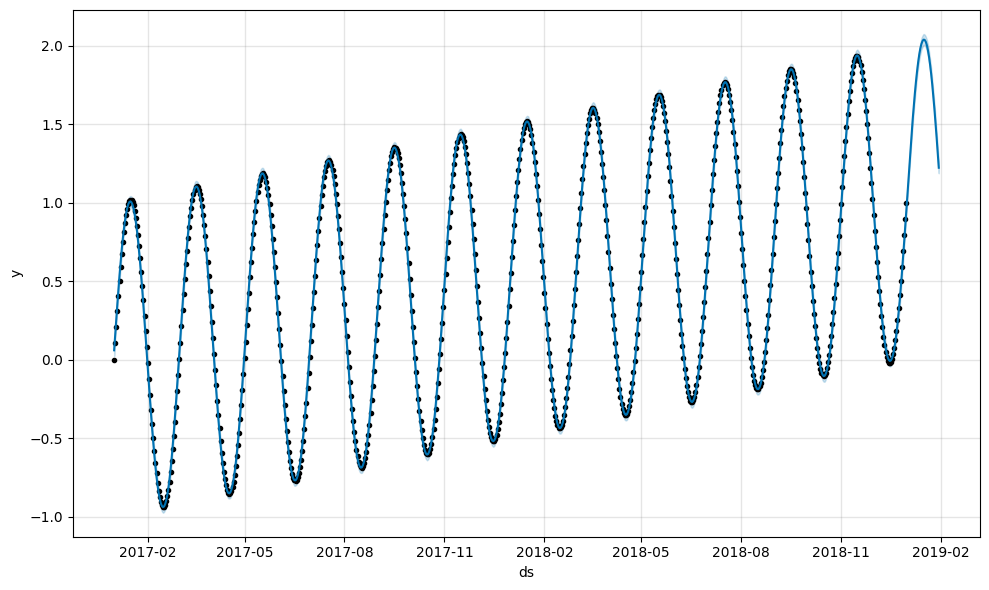

In [17]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

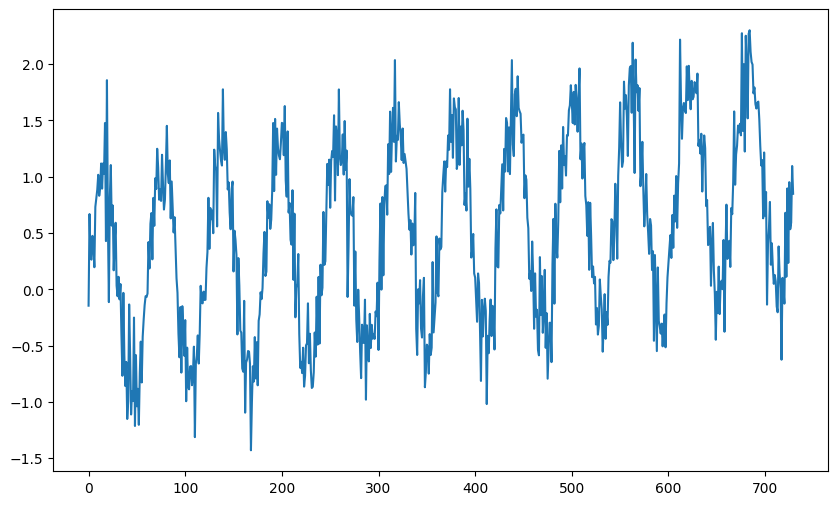

In [18]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4

ds = pd.date_range("2017-01-01", periods=365*2, freq='D')
df = pd.DataFrame({'ds':ds, 'y':result})
df['y'].plot(figsize=(10,6));

09:56:56 - cmdstanpy - INFO - Chain [1] start processing
09:56:56 - cmdstanpy - INFO - Chain [1] done processing
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


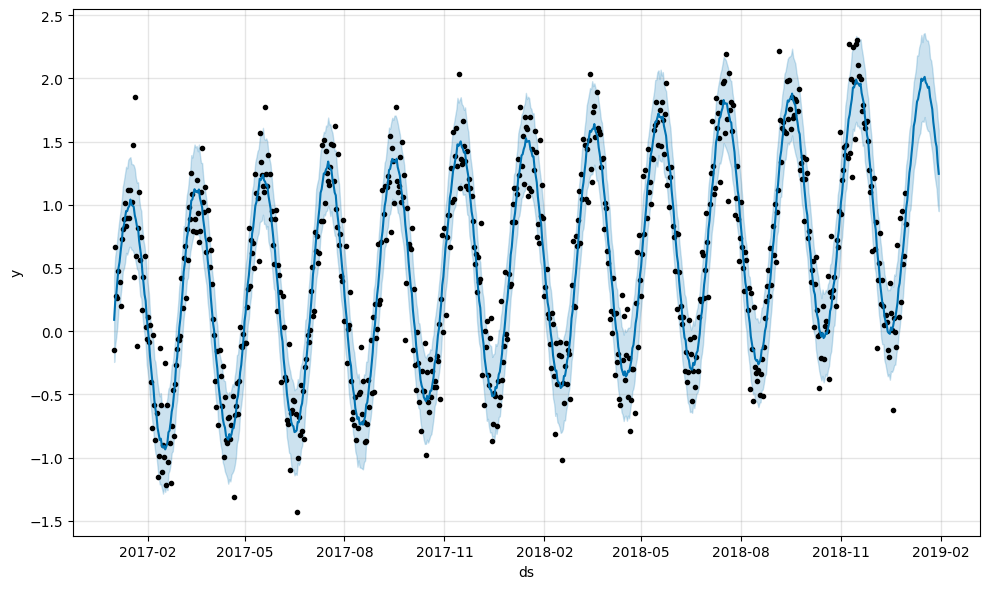

In [20]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

In [21]:
pinkwink_web = pd.read_excel('/home/addinedu/dev_ws/data/pinkwink_web.xlsx', names=['ds','hit'])
pinkwink_web.head()

,ds,hit
0,2016-01-01,2332
1,2016-01-02,3110
2,2016-01-03,3110
3,2016-01-04,6742
4,2016-01-05,7867


10:00:35 - cmdstanpy - INFO - Chain [1] start processing
10:00:35 - cmdstanpy - INFO - Chain [1] done processing
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


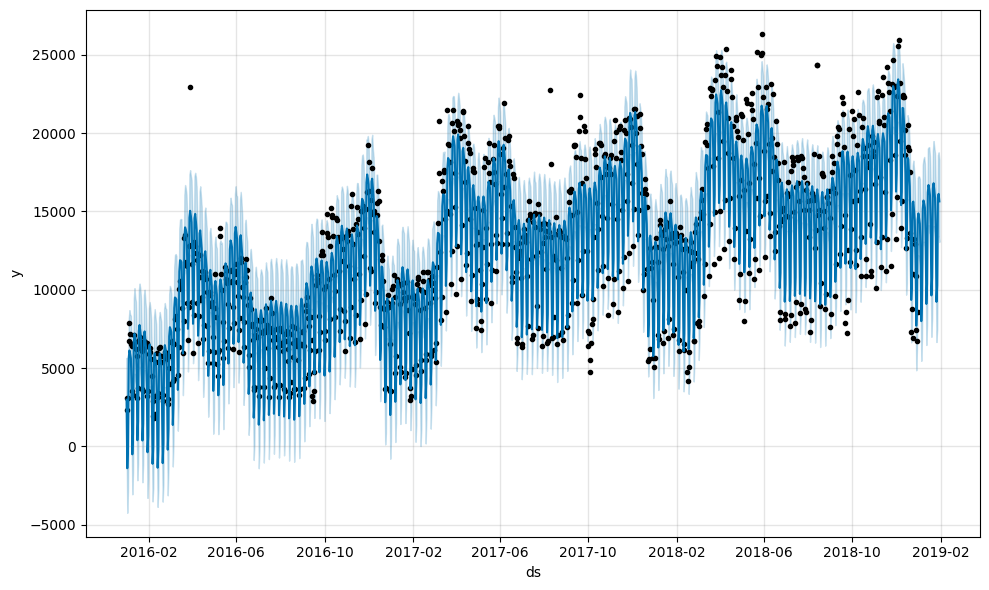

In [22]:
df = pd.DataFrame({'ds':pd.to_datetime(pinkwink_web['ds'], format="%y. %m. %d."), 'y':pinkwink_web['hit']})

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

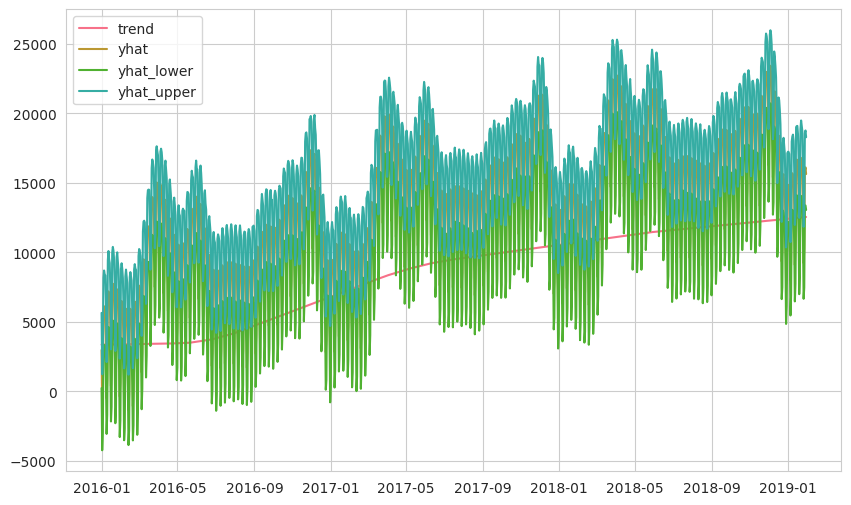

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette('husl')

plt.figure(figsize=(10,6))
for each in ['trend', 'yhat', 'yhat_lower', 'yhat_upper']:
    plt.plot(forecast['ds'], forecast[each], label=each)

plt.legend(loc='best')
plt.show()

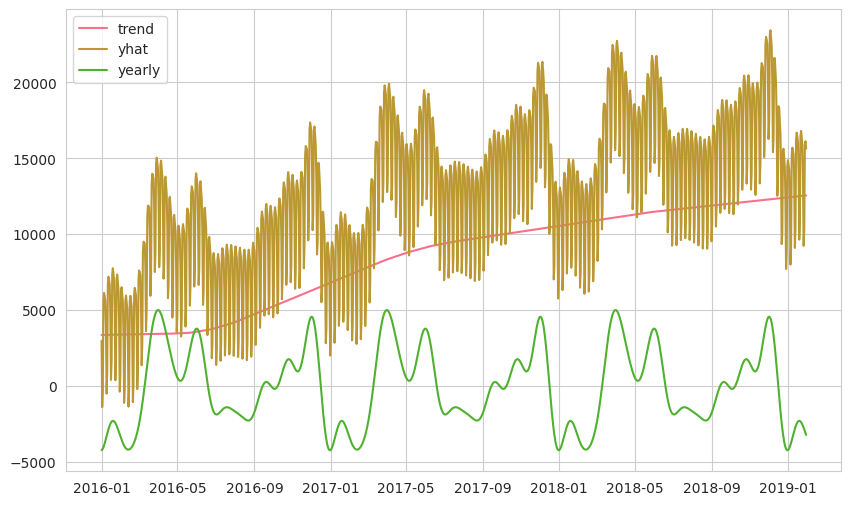

In [24]:

plt.figure(figsize=(10,6))
for each in ['trend', 'yhat', 'yearly']:
    plt.plot(forecast['ds'], forecast[each], label=each)

plt.legend(loc='best')
plt.show()

/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an 

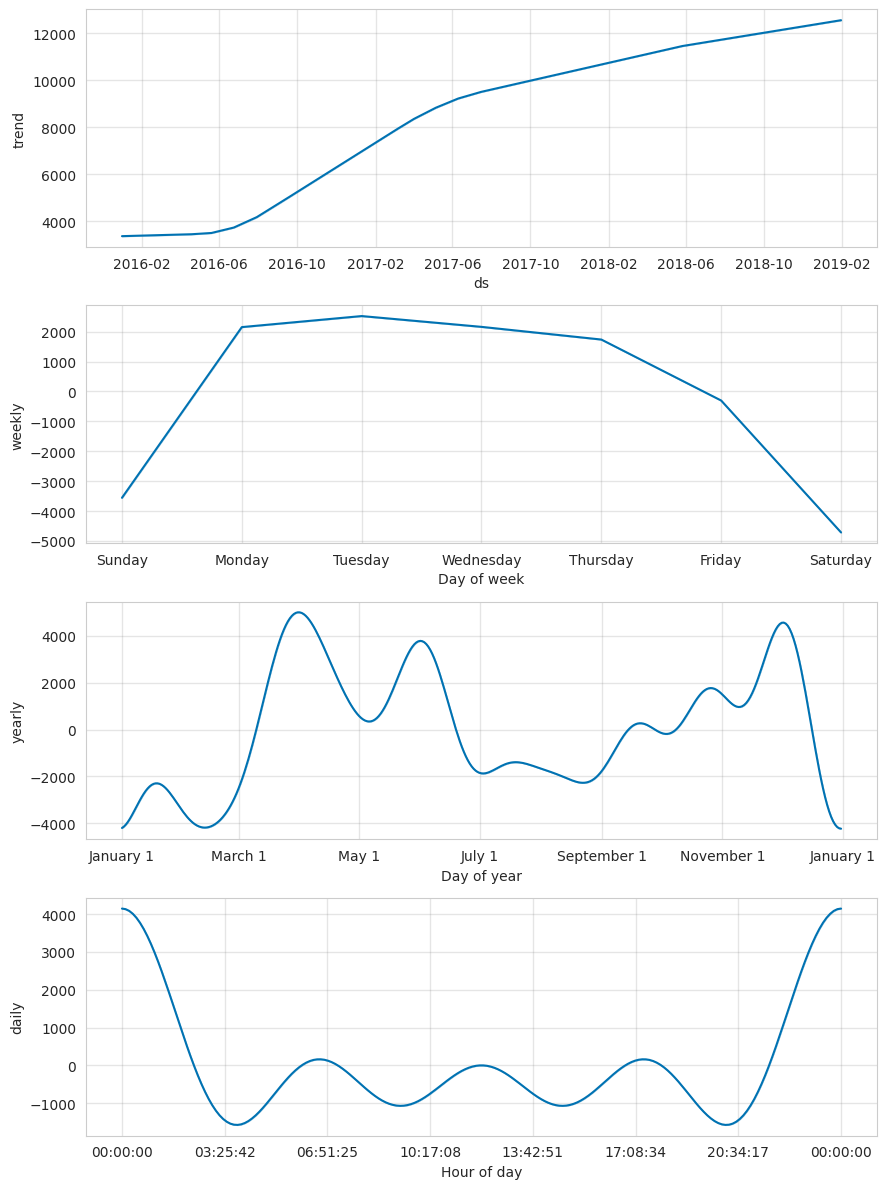

In [25]:
m.plot_components(forecast);